# G2M insight for Cab Investment firm(EDA)


# Description 

- The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

- Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

- DataSet

There are 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

1. Cab_Data.csv – this file includes details of transaction for 2 cab companies

2. Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

3. Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

4. City.csv – this file contains list of US cities, their population and number of cab users



# Part 1: Understand Each Dataset

## Libraries

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


## Dataset



### 1. Cab_Data

In [ ]:
cab_df = pd.read_csv('/content/Cab_Data.csv')
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


change the type of Data of Travel into DateTime 

In [ ]:
# change the type of Date of Travel datatype into DateTime 
time = cab_df['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in time]
cab_df['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [ ]:
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [ ]:
cab_df.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [ ]:
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [ ]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

### 2. City_Data 

In [ ]:
city_df = pd.read_csv('/content/City.csv')
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
# change the type of Population
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(int)

# change the type of users
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(int)

In [ ]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


### Customer_ID Data

In [ ]:
customer_id_df = pd.read_csv('/content/Customer_ID.csv')
customer_id_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
customer_id_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


### 3. Transaction_ID Data

In [ ]:
transaction_id_df = pd.read_csv('/content/Transaction_ID.csv')
transaction_id_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
transaction_id_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


# Part 2 Merge & Cleaning

 Merge the Whole Dataset

In [ ]:
df= cab_df.merge(transaction_id_df, on= 'Transaction ID').merge(customer_id_df, on ='Customer ID').merge(city_df, on = 'City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [ ]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [ ]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [ ]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [ ]:
draw_missing_data_table(df)

,Total,Percent
Transaction ID,0,0.0
Date of Travel,0,0.0
Company,0,0.0
City,0,0.0
KM Travelled,0,0.0
Price Charged,0,0.0
Cost of Trip,0,0.0
Customer ID,0,0.0
Payment_Mode,0,0.0
Gender,0,0.0


In [ ]:
duplicated_rows = df[df.duplicated()]
print('Duplicated rows:', duplicated_rows.shape[0])

Duplicated rows: 0


- No missing data in our dataset
- No Duplicated rows

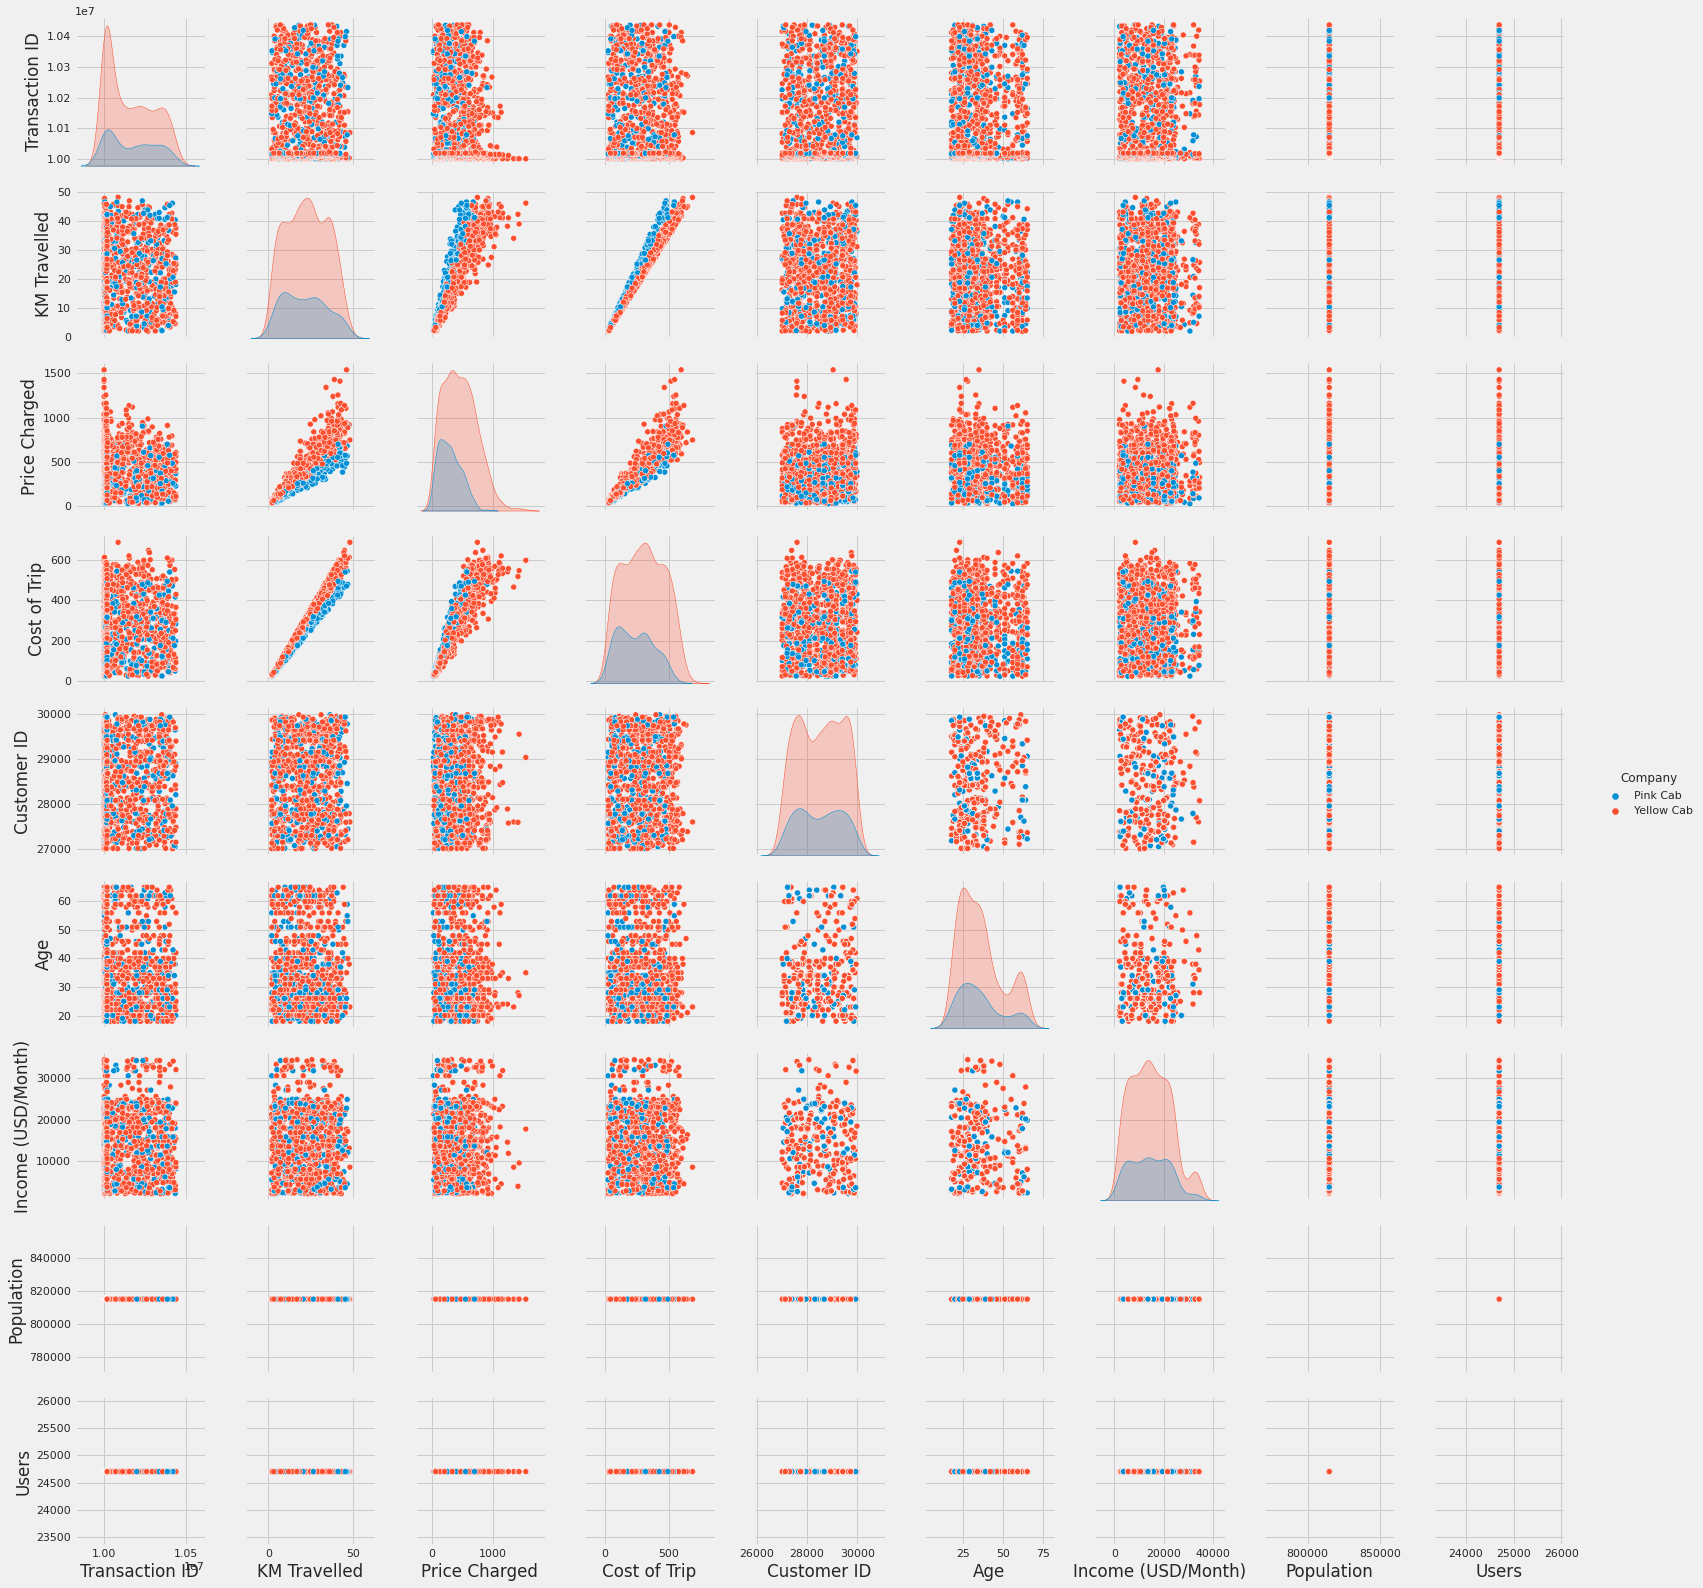

In [ ]:
sns.pairplot(df.head(1000), hue = 'Company')

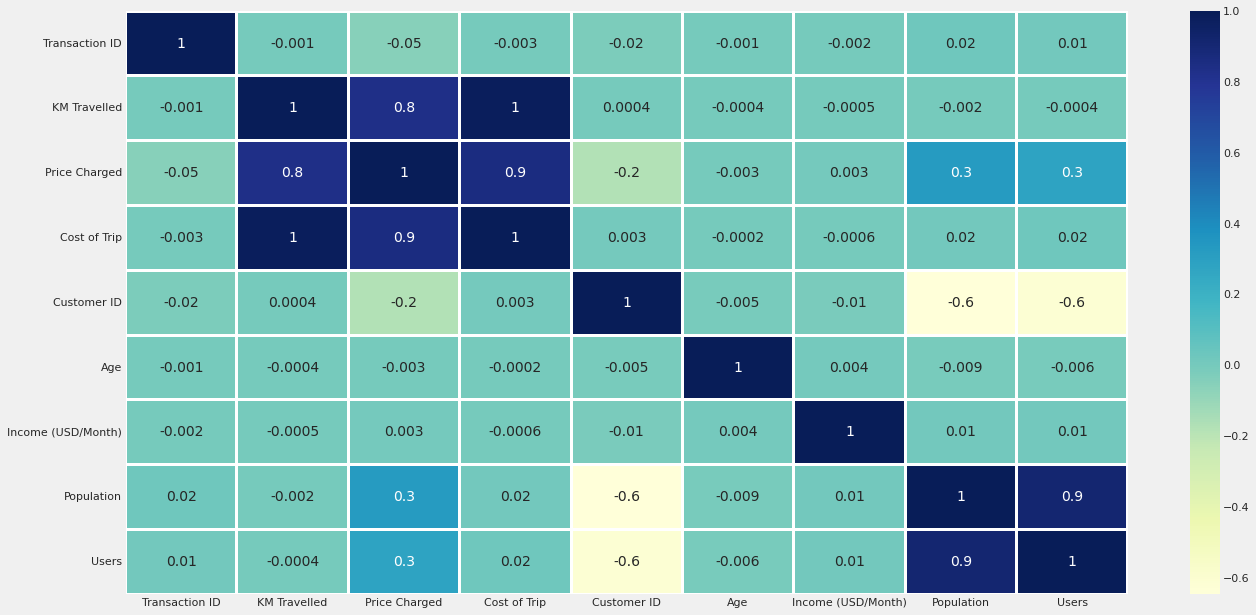

In [ ]:
plt.figure(figsize=(20,10))
corrmat=df.corr()
sns.heatmap(corrmat, annot=True,linewidths =2,cmap="YlGnBu", fmt='.1g')

As heatmap shown, there are strong Correlation between
- Population & Users
- Price Charged & Cost of Trip & KM Travelled

# Part 3: Features Analysis

Price Charged

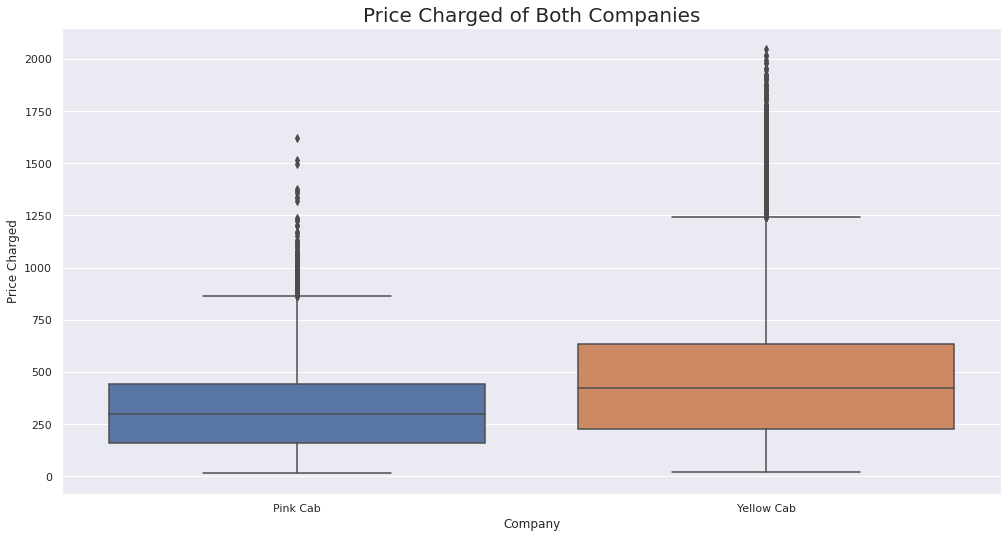

In [ ]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (15, 8))

sns.boxplot(df['Company'], df['Price Charged'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

KM Travelled

Text(0.5, 0, 'Km Travelled')

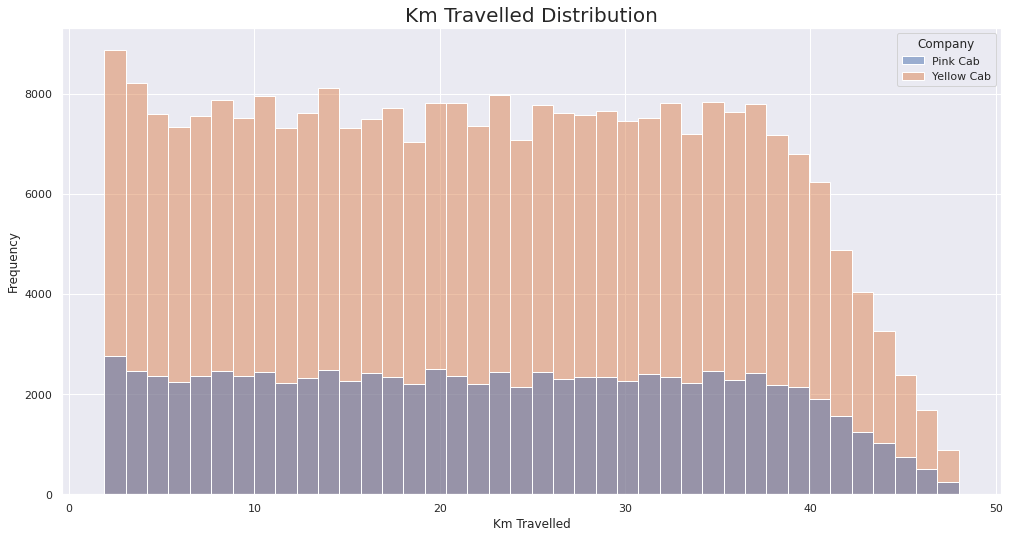

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.histplot(data=df, x="KM Travelled",bins=40, hue="Company")
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

Payment Mode

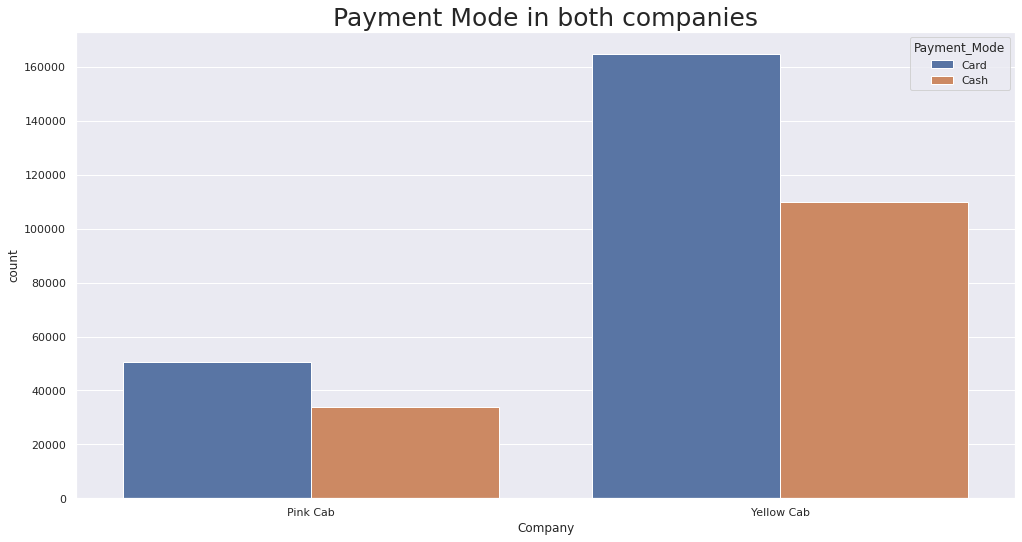

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

Users Gender

In [ ]:
gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


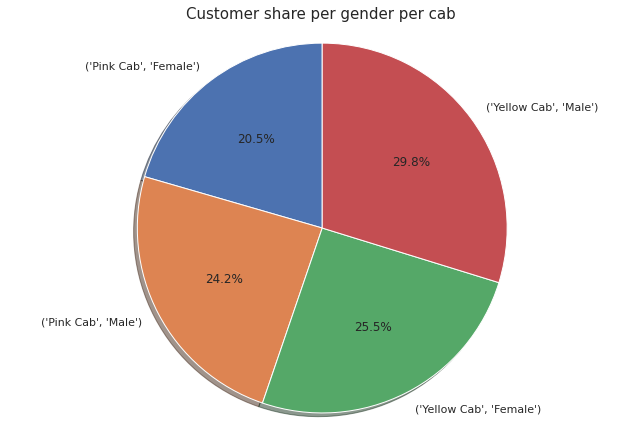

In [ ]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

Users Age

Text(0.5, 0, 'Age')

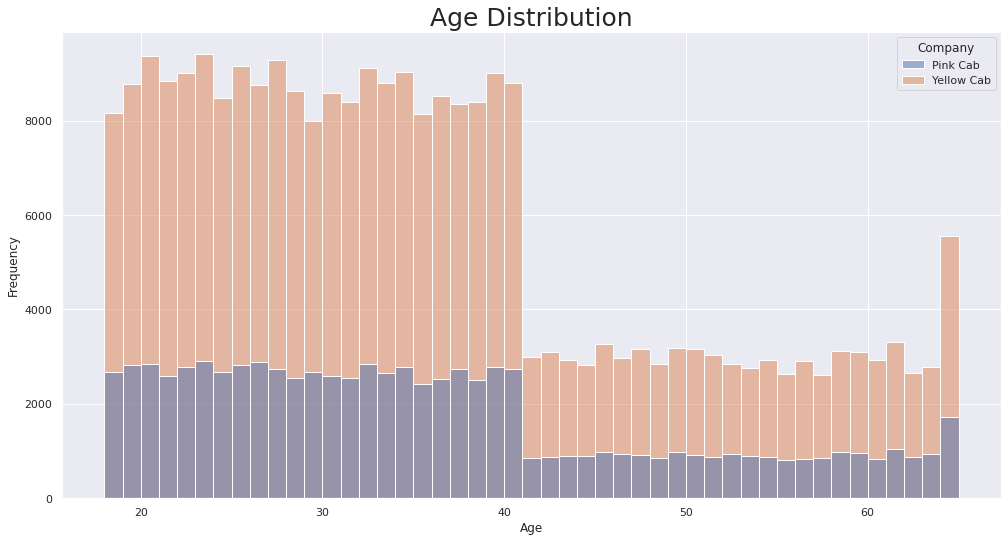

In [ ]:
plt.figure(figsize=(15,8))
pal = ['#9b59b6', '#e74c3c']
sns.histplot(data=df, x='Age', bins=47, hue="Company")
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Frequency')
plt.xlabel('Age')

Users respected Cities

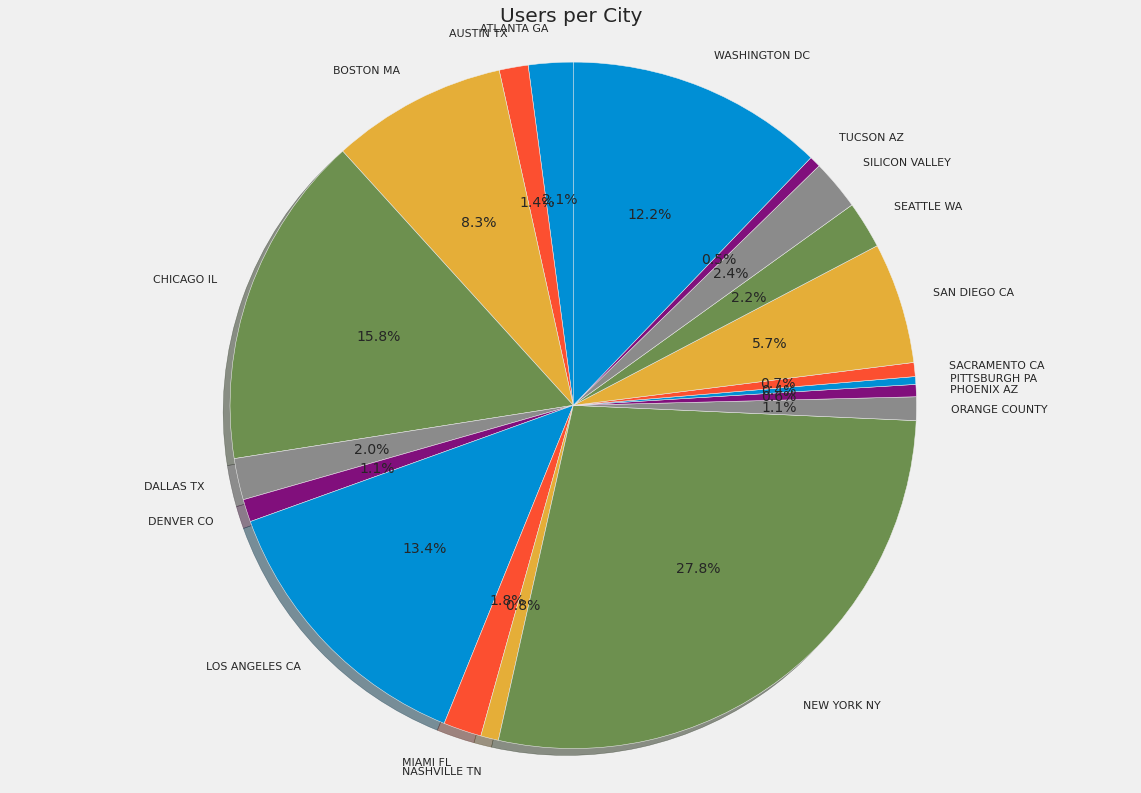

In [ ]:
city_users = df.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
vals = city_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

Cost of Trip

Text(0.5, 0, 'Cost of Trip')

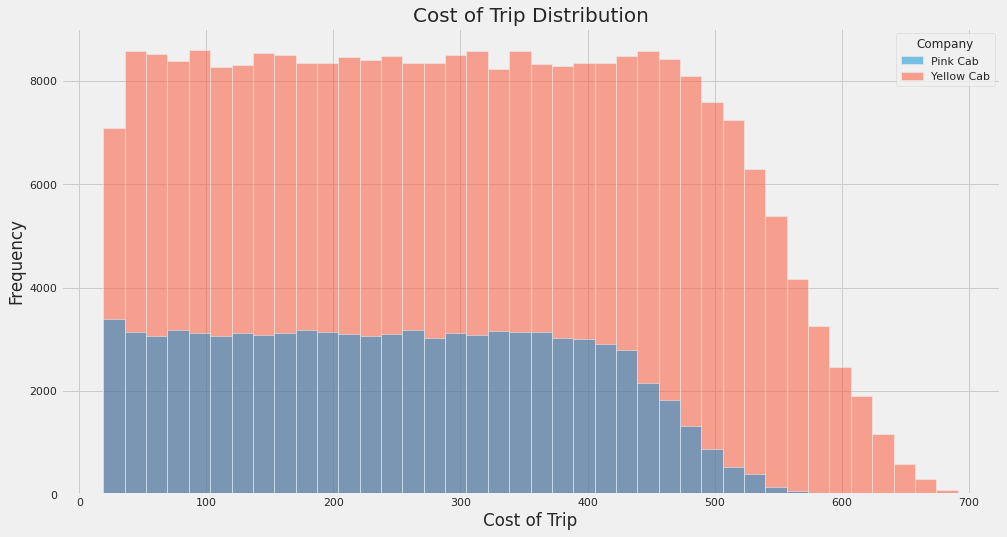

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x="Cost of Trip",bins=40 , hue="Company")
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Profit

In [ ]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

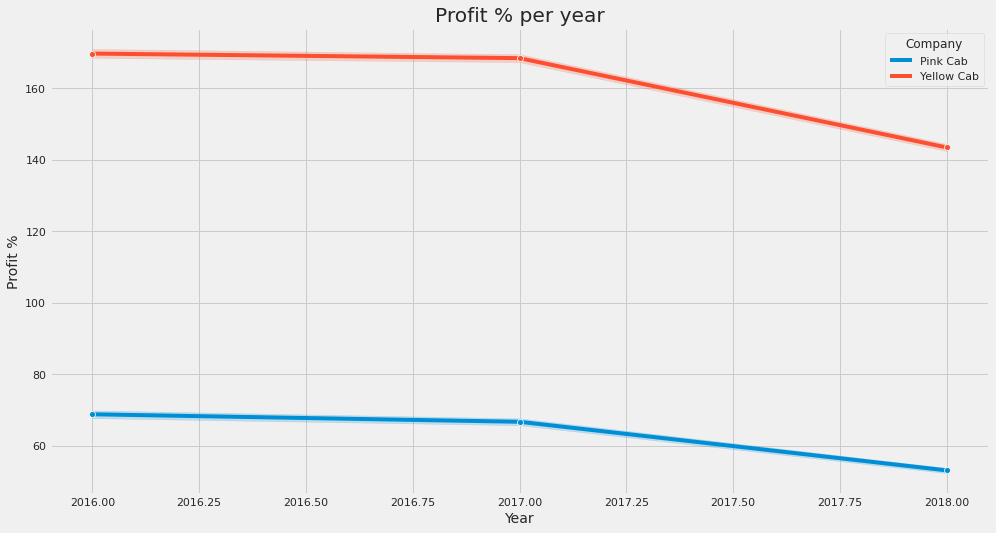

In [ ]:
plt.figure(figsize = (15, 8))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

Yellow cab has a higher Profit than Pink cab

KM Travelled per Price Charged & Cost of trip

Text(0.5, 1.0, 'Cost of Trip - KM Travelled')

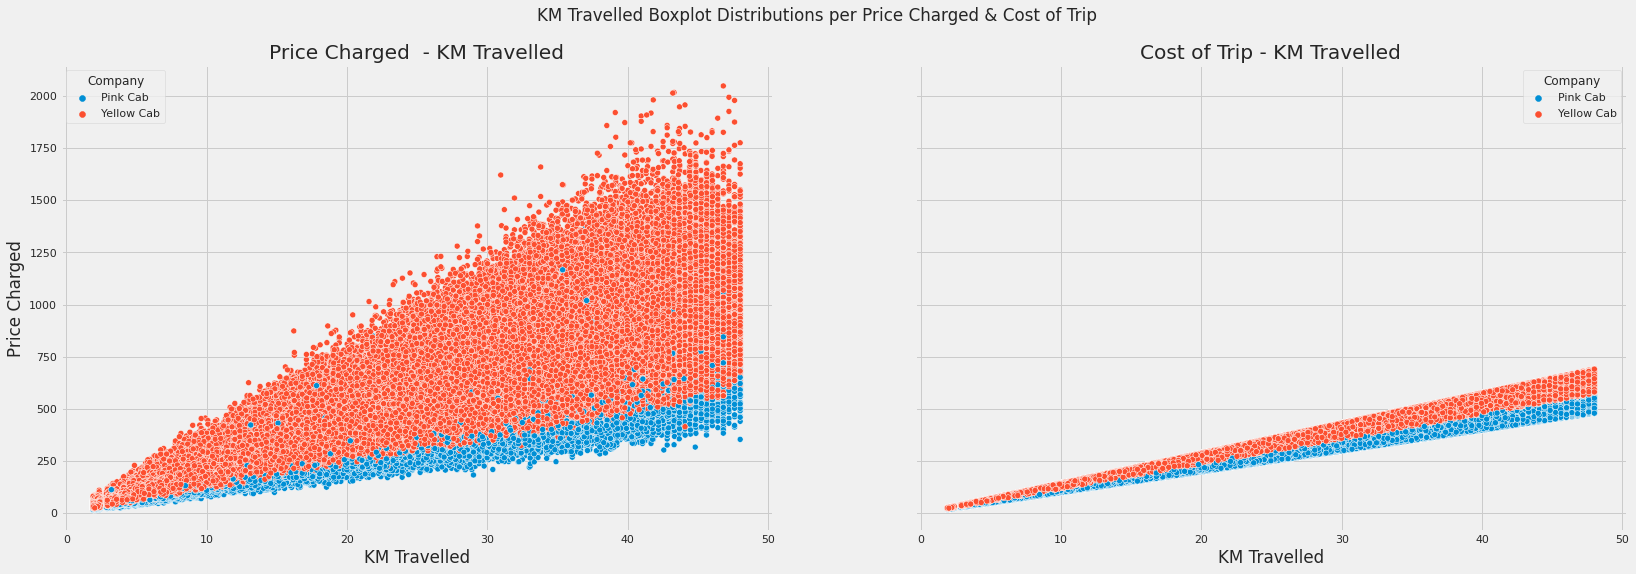

In [ ]:
# Here visualized scatter plots of MasterData features to see correlations between them if exists
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('KM Travelled Boxplot Distributions per Price Charged & Cost of Trip')
sns.scatterplot(ax=axes[0],data=df, x='KM Travelled', y='Price Charged' , hue="Company").set_title("Price Charged  - KM Travelled")
sns.scatterplot(ax=axes[1],data=df, x='KM Travelled', y='Cost of Trip' , hue="Company").set_title("Cost of Trip - KM Travelled")

# Part 4: Hypothesis

## Hypothesis 1: Is there any difference in Profit regarding Payment mode

In [ ]:
# Pink Cab
x = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
  print('We accept alternate hypothesis that theres a difference')
else:
  print('We accept null hypothesis that theres no difference')

P value is  0.7900465828793288
We accept null hypothesis that theres no difference


In [ ]:
#yellow cab 
x = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
  print('We accept alternate hypothesis that theres a difference')
    
else:
  print('We accept null hypothesis that theres no difference')
  

P value is  0.2933060638298729
We accept null hypothesis that theres no difference


There is no difference in payment mode for both cab companies.

## Hypothesis 2: Is there any difference in profit regarding Gender

In [ ]:
# Pink Cab
x = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])

_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
  print('We accept alternate hypothesis that theres a difference')
    
else:
  print('We accept null hypothesis that theres no difference')

47231 37480
P value is  0.11515305900425798
We accept null hypothesis that theres no difference


In [ ]:
#yellow cab 
x = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])

_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
  print('We accept alternate hypothesis that theres a difference')
    
else:
  print('We accept null hypothesis that theres no difference')

158681 116000
P value is  6.060473042494144e-25
We accept alternate hypothesis that theres a difference


- There is no difference regarding Gender in  cab companies.
- There is difference regarding Gender in Yellow cab companies.

## Hypothesis 3: Is there any difference in Profit regarding Age


In [ ]:
# Pink Cab
x = df[(df.Age <= 50)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df.Age >= 50)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])

_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
  print('We accept alternate hypothesis that theres a difference')
    
else:
  print('We accept null hypothesis that theres no difference')

71228 14405
P value is  0.3905344473325604
We accept null hypothesis that theres no difference


In [ ]:
#yellow cab 
x = df[(df.Age <= 50)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df.Age >= 50)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])

_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
  print('We accept alternate hypothesis that theres a difference')   
else:
  print('We accept null hypothesis that theres no difference')

231480 46368
P value is  3.893841736668538e-05
We accept alternate hypothesis that theres a difference


- There is no difference regarding Gender in pink cab companies.
- There is difference regarding Gender in Yellow cab companies.

# Conclusion: 
- From the above analysis, it seems that Yellow Cab is better than Pink
Cab.
- Each variable distribution of Yellow Cab is much higher than Pink Cab.
- Yellow Cab Firm has more users than Pink Cab Firm in market Share.
- Yellow Cab Firm has higher profit than Pink Cab.
- Yellow Cab has more transactions than Pink Cab in market Share.
- the Yellow Cab Firm is highly recommended.